<h1 style="color:green" align="center">Assignment 11 - Predicting Car Prices with ML</h1>

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

import matplotlib.pyplot as plt
import seaborn as sns

from word2number import w2n
from termcolor import colored

import warnings as wr
wr.filterwarnings('ignore')

### Data Loading:

In [2]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
data = pd.read_csv(url)
data.head(6)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [3]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [4]:
data.shape

(202, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [6]:
data.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

##  Pre-processing: Handling Wrong Enteries

In [7]:
# Checking for wrong enteries like symbols -, ?, # * etc,
for col in data.columns:
    print('{} :{}'.format(col, data[col].unique()))

symboling :[ 3  1  2  0 -1 -2]
normalized-losses :[ nan 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 122. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.
  87.  77.  91. 134.  65. 197.  90.  94. 256.  95.]
make :['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type :['gas' 'diesel']
aspiration :['std' 'turbo']
num-of-doors :['two' 'four' nan]
body-style :['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels :['rwd' 'fwd' '4wd']
engine-location :['front' 'rear']
wheel-base :[ 88.6  94.5  99.8  99.4 105.8 101.2 103.5 110.   88.4  93.7 103.3  95.9
  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7 115.6
  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2 107.9
 114.2

**Finding:** Data contains symbol "?" that have to be replaced with NAN.

In [8]:
data = data.replace('?',np.NAN)

## Pre-processing: Handling Dtype Problems

In [9]:
def uniq (df1):
    cols = ['feature','values','dtypes','len']
    df1 = pd.DataFrame([[i,df1[i].unique(),df1[i].dtype,len(df1[i].unique())] for i in df1.columns], 
                       columns = cols).set_index('feature')
    return df1

unique_feature = uniq(data)
unique_feature

,values,dtypes,len
feature,,,
symboling,"[3, 1, 2, 0, -1, -2]",int64,6
normalized-losses,"[nan, 164.0, 158.0, 192.0, 188.0, 121.0, 98.0,...",float64,52
make,"[alfa-romero, audi, bmw, chevrolet, dodge, hon...",object,22
fuel-type,"[gas, diesel]",object,2
aspiration,"[std, turbo]",object,2
num-of-doors,"[two, four, nan]",object,3
body-style,"[convertible, hatchback, sedan, wagon, hardtop]",object,5
drive-wheels,"[rwd, fwd, 4wd]",object,3
engine-location,"[front, rear]",object,2


**Note:** 
. Some numerical features are in 'object' format, we have to convert it into 'float' or 'int' format to perform operations.

#### Convert numerical data into 'float':

In [10]:
convert_col = ['bore',  'stroke', 'horsepower', 'peak-rpm']
for col in convert_col:
    data[col]=pd.to_numeric(data[col]) #convert float
    
#pd.to_numeric(data[col]).astype(int/float)

In [11]:
# Checking numerical features dtype
def data_type (df2):
    num_cols = ['symboling','normalized-losses','wheel-base', 'length', 'width', 'height','engine-size','bore', 'stroke', 
                'compression-ratio','horsepower', 'peak-rpm', 'city-mpg','highway-mpg','price']
    
    df2 = pd.DataFrame([[i, df2[i].unique(), df2[i].dtype] for i in num_cols],columns= ['feature','value','dtype'])
    return df2

data_type(data)

,feature,value,dtype
0,symboling,"[3, 1, 2, 0, -1, -2]",int64
1,normalized-losses,"[nan, 164.0, 158.0, 192.0, 188.0, 121.0, 98.0,...",float64
2,wheel-base,"[88.6, 94.5, 99.8, 99.4, 105.8, 101.2, 103.5, ...",float64
3,length,"[168.8, 171.2, 176.6, 177.3, 192.7, 176.8, 189...",float64
4,width,"[64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 64.8, 66....",float64
5,height,"[48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 53.7, 56....",float64
6,engine-size,"[130, 152, 109, 136, 131, 108, 164, 209, 61, 9...",int64
7,bore,"[3.47, 2.68, 3.19, 3.13, 3.5, 3.31, 3.62, 2.91...",float64
8,stroke,"[2.68, 3.47, 3.4, 2.8, 3.19, 3.39, 3.03, 3.11,...",float64
9,compression-ratio,"[9.0, 10.0, 8.0, 8.5, 8.3, 8.8, 9.5, 9.6, 9.41...",float64


**Conclusion:** 
1. The 'Object' formatted Numerical features are converted successfully to 'float' format.
2. All Numerical features are now in 'float' or 'int' format.

## Pre-processing: Handling Missing values

In [12]:
#finding missing values
data.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

<Axes: >

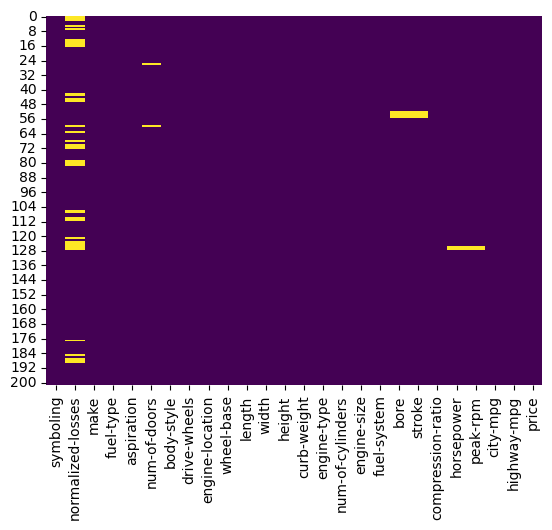

In [13]:
#visualizing null values
sns.heatmap(data.isnull(), cbar = False, linecolor = 'yellow', cmap = 'viridis') #[cmap = plasma, inferno, magma]

**Findings:**
1. There are 6 features that contains missing value, 5 numerical feature and 1 categorical feature.<br> 
2. Numerical features with missing values are 'normalized-losses','bore','stroke','horsepower','peak-rpm'. <br>
3. Only Categorical feature with missing value is 'num-of-doors'.

#### Basic statistics for missing value features

In [14]:
missing_num_col = ['normalized-losses','bore','stroke','horsepower','peak-rpm']

df_col_name = ['Feature','Min','5th percentile','Q1','Median','Mean','Mode','Q3','95th percentile','Maximum']

def quick_stat (df2):
    df2 = pd.DataFrame([[i, df2[i].min(), df2[i].quantile(.05), df2[i].quantile(.25), df2[i].median(), df2[i].mean(),
                         df2[i].mode()[0], df2[i].quantile(.75), df2[i].quantile(.95), df2[i].max()] for i in missing_num_col],
                       columns= df_col_name)
    return df2

quick_stat(data)

,Feature,Min,5th percentile,Q1,Median,Mean,Mode,Q3,95th percentile,Maximum
0,normalized-losses,65.00,74.0000,94.00,115.00,121.836364,161.00,150.00,188.00,256.00
1,bore,2.54,2.9625,3.15,3.31,3.332980,3.62,3.59,3.78,3.94
2,stroke,2.07,2.6400,3.11,3.29,3.256364,3.40,3.41,3.64,4.17
3,horsepower,48.00,62.0000,70.00,95.00,103.450000,68.00,116.00,176.30,262.00
4,peak-rpm,4150.00,4247.5000,4800.00,5200.00,5119.000000,4800.00,5500.00,6000.00,6600.00


In [15]:
missing_cat_col = ['num-of-doors']
data['num-of-doors'].mode()

0    four
Name: num-of-doors, dtype: object

In [16]:
#data.describe().T

#### Histogram for missing value features

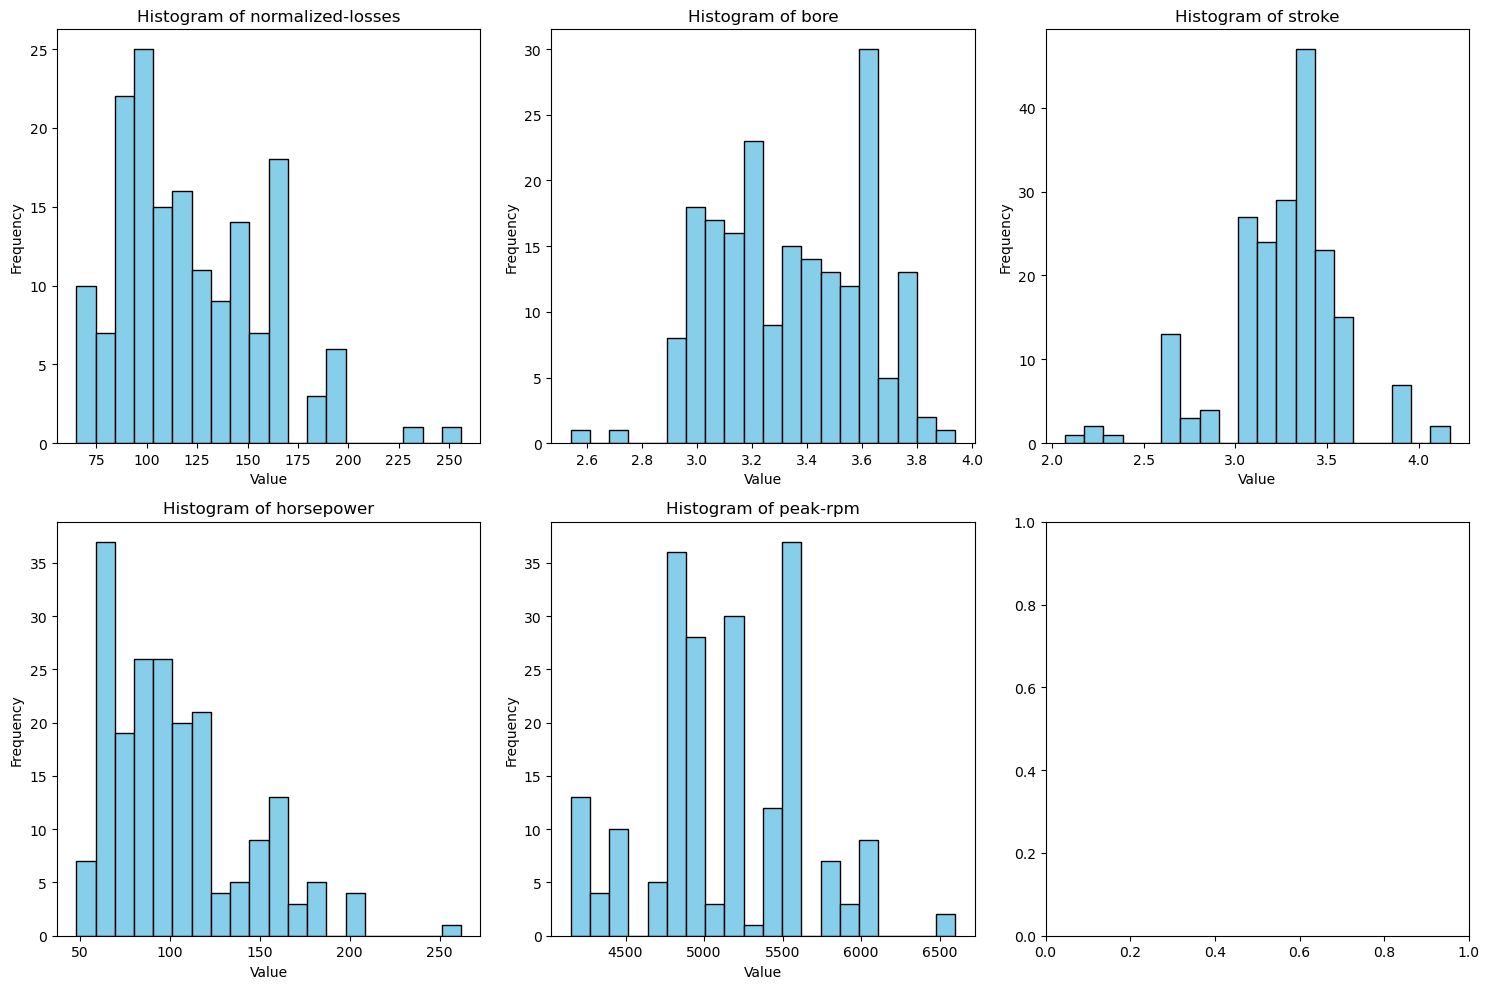

In [17]:
missing_num_col = ['normalized-losses', 'bore',  'stroke', 'horsepower', 'peak-rpm']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, col in enumerate(missing_num_col):
    axs[i].hist(data[col], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

**Findings:**
1. Observing basic statistics and histogram it seems data of missing value features have some outliers.

### Filling missing values:
1. fill missing data of numerical feature with the respective column median since data have outliers.
2. fill missing data of categorcal feature with the mode of the respective column.

In [18]:
df = data.copy()

In [19]:
#filling numerical features
missing_num_col = ['normalized-losses', 'bore',  'stroke', 'horsepower', 'peak-rpm']
for col in missing_num_col:
    df[col].fillna(df[col].median(), inplace=True)

#missing value of Categorical feature 'num-of-doors' is replaced with mode.
missing_cat_col = ['num-of-doors']
df['num-of-doors'] = df['num-of-doors'].replace(np.nan,'four')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [20]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

**Conclusion:** Now there is no missing value in the dataset.

## Pre-processing: Convert word to number

In [21]:
df['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [22]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [23]:
#from word2number import w2n
df['num-of-doors'] = df['num-of-doors'].apply(w2n.word_to_num)
df['num-of-cylinders'] = df['num-of-cylinders'].apply(w2n.word_to_num)

In [24]:
df['num-of-doors'].unique()

array([2, 4], dtype=int64)

In [25]:
df['num-of-cylinders'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

# Pre-processing: Encoding (OneHot Encoder)

In [26]:
cat_features = ['make','fuel-type','aspiration','body-style','drive-wheels',
                'engine-location','engine-type','fuel-system']

df_hot = pd.get_dummies(df, columns = cat_features, drop_first=True)
df_hot.head()
#encoded_data.to_csv('encoded_data.csv')

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115.0,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
1,3,115.0,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
2,1,115.0,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,1,0,0,0,0,0,1,0,0
3,2,164.0,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,1,0,0


# Pre-processing: Encoding (Label Encoder)

In [27]:
#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_label = df.copy()
cat_features = ['make','fuel-type','aspiration','body-style',
                'drive-wheels','engine-location','engine-type','fuel-system']

for i in cat_features:
    df_label[i] = le.fit_transform(df_label[[i]])
    
df_label.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,115.0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,115.0,0,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,1,1,0,4,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,1,1,0,4,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450


# Implementing Linear Resression Model

**We will perform four LR Model as:** <br>
    1. OneHot Encoding, no scaling <br>
    2. OneHot Encoding, standard scaling <br>
    3. Label Encoding, no scaling <br>
    4. Label Encoding, Standard scaling

## Model: 1 (OneHot Encoding, no scaling)

In [28]:
X = df_hot.drop('price', axis = 1) #X = df_hot.loc[:,'symboling':'highway-mpg']
y = df_hot['price']

#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)


In [29]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [30]:
#predicted_price = reg.predict(X_test)

### Model_1 Evaluation

In [31]:
train1 = reg.score(X_train, y_train)
test1 = reg.score(X_test, y_test)
r2_score1 = r2_score(y_test, reg.predict(X_test))
mse1 = mean_squared_error(y_test, reg.predict(X_test))
rmse1 = math.sqrt(mse1)
mae1 = mean_absolute_error(y_test, reg.predict(X_test))

print('Train accuracy: ',train1)
print('Test accuracy: ',test1)
print('r2_score: ',r2_score1)
print('MSE: ',mse1)
print('RMSE: ',rmse1)
print('MAE: ',mae1)

Train accuracy:  0.9614886044761587
Test accuracy:  0.9275544908092279
r2_score:  0.9275544908092279
MSE:  6497892.981665799
RMSE:  2549.0965030115667
MAE:  1667.576406640075


#### Visualization: Actual Vs Predicted Price

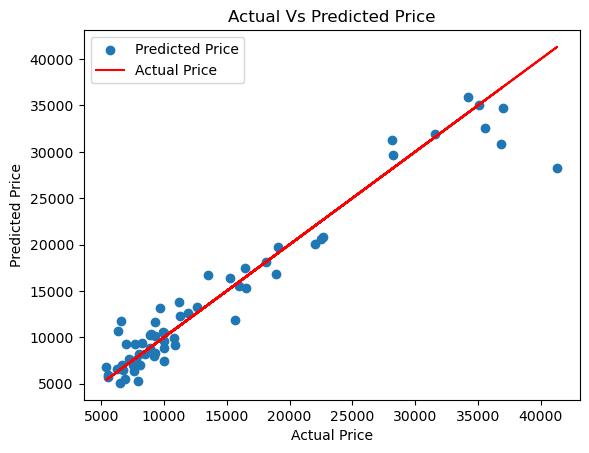

In [32]:
plt.scatter(x=y_test,y=reg.predict(X_test),label = 'Predicted Price')
plt.plot(y_test,y_test,color = 'red',label = 'Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted Price')
plt.legend()
plt.show()

### Model: 2 (OneHot Encoding, standard scaling)

In [33]:
scaler = StandardScaler()
std_X_train = scaler.fit_transform(X_train)
std_X_test = scaler.transform(X_test)

In [34]:
std_X_train

array([[-0.64321094, -0.4196814 ,  0.81167945, ..., -0.91168461,
        -0.21081851, -0.08451543],
       [ 0.16654569, -0.5889465 , -1.23201345, ..., -0.91168461,
        -0.21081851, -0.08451543],
       [-0.64321094,  2.35626619,  0.81167945, ...,  1.09687055,
        -0.21081851, -0.08451543],
       ...,
       [ 0.16654569,  0.32508502, -1.23201345, ..., -0.91168461,
        -0.21081851, -0.08451543],
       [ 0.97630232,  0.12196691, -1.23201345, ...,  1.09687055,
        -0.21081851, -0.08451543],
       [ 1.78605896,  2.5593843 , -1.23201345, ...,  1.09687055,
        -0.21081851, -0.08451543]])

In [35]:
reg2 = LinearRegression().fit(std_X_train, y_train)
reg2

LinearRegression()

In [36]:
#reg2.predict(std_X_test)

### Model_2 Evaluation

In [37]:
train2 = reg2.score(std_X_train, y_train)
test2 = reg2.score(std_X_test, y_test)
r2_score2 = r2_score(y_test, reg2.predict(std_X_test))
mse2 = mean_squared_error(y_test, reg2.predict(std_X_test))
rmse2 = math.sqrt(mse2)
mae2 = mean_absolute_error(y_test, reg2.predict(std_X_test))


print('Train accuracy : ',reg2.score(std_X_train, y_train))
print('Test accuracy : ',reg2.score(std_X_test, y_test))
print('MSE: ',mean_squared_error(y_test, reg2.predict(std_X_test)))
print('RMSE: ',math.sqrt(mean_squared_error(y_test, reg2.predict(std_X_test))))
print('MAE: ',mean_absolute_error(y_test, reg2.predict(std_X_test)))
print('r2_score: ',r2_score(y_test, reg2.predict(std_X_test)))

Train accuracy :  0.9614886044761588
Test accuracy :  0.9256087447630086
MSE:  6672413.800403352
RMSE:  2583.1015853820677
MAE:  1672.798947616539
r2_score:  0.9256087447630086


#### Visualization: Actual Vs Predicted Price

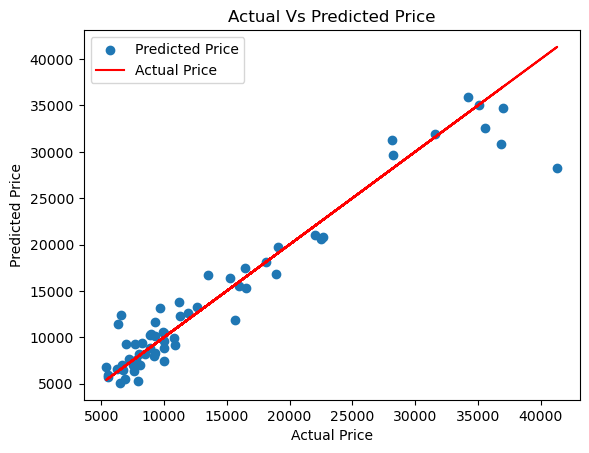

In [38]:
plt.scatter(x=y_test, y=reg2.predict(std_X_test), label = 'Predicted Price')
plt.plot(y_test,y_test,color = 'red',label = 'Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted Price')
plt.legend()
plt.show()

### Model: 3 (Label Encoding, no scaling)

In [39]:
#selection of feature and target variables
X1 = df_label.loc[:,'symboling':'highway-mpg']
y1 = df_label['price']

#splitting dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3,random_state = 42)

In [40]:
X1_train.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
97,0,106.0,12,1,0,4,3,1,0,97.2,...,4,120,1,3.33,3.47,8.5,97.0,5200.0,27,34
31,1,101.0,5,1,0,2,2,1,0,93.7,...,4,79,0,2.91,3.07,10.1,60.0,5500.0,38,42
12,0,188.0,2,1,0,4,3,2,0,101.2,...,6,164,5,3.31,3.19,9.0,121.0,4250.0,21,28
35,0,78.0,5,1,0,4,4,1,0,96.5,...,4,92,0,2.92,3.41,9.2,76.0,6000.0,30,34
119,1,154.0,14,1,0,4,3,1,0,93.7,...,4,98,1,2.97,3.23,9.4,68.0,5500.0,31,38


In [41]:
reg3 = LinearRegression().fit(X1_train, y1_train)
reg3

LinearRegression()

In [42]:
#reg3.predict(X1_test)

### Model_3  Evaluation

In [43]:
train3 = reg3.score(X1_train, y1_train)
test3 = reg3.score(X1_test, y1_test)
r2_score3 = r2_score(y1_test, reg3.predict(X1_test))
mse3 = mean_squared_error(y1_test, reg3.predict(X1_test))
rmse3 = math.sqrt(mse3)
mae3 = mean_absolute_error(y1_test, reg3.predict(X1_test))


print('Train accuracy : ',reg3.score(X1_train, y1_train))
print('Test accuracy : ',reg3.score(X1_test, y1_test))
print('r2_score: ',r2_score(y1_test, reg3.predict(X1_test)))
print('MSE : ',mean_squared_error(y1_test, reg3.predict(X1_test)))
print('RMSE : ',math.sqrt(mean_squared_error(y1_test, reg3.predict(X1_test))))
print('MAE : ',mean_absolute_error(y1_test, reg3.predict(X1_test)))

Train accuracy :  0.9090713638617851
Test accuracy :  0.8378049461028871
r2_score:  0.8378049461028871
MSE :  14547845.879633933
RMSE :  3814.163850653762
MAE :  2582.0266705874183


#### Visualization: Actual Vs Predicted Price

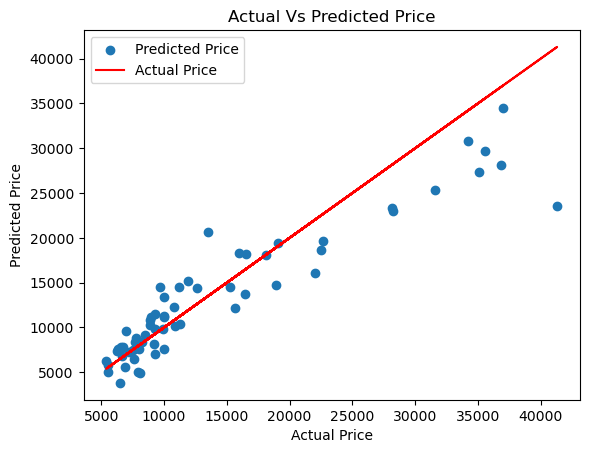

In [44]:
plt.scatter(x=y1_test, y=reg3.predict(X1_test), label = 'Predicted Price')
plt.plot(y1_test,y1_test,color = 'red',label = 'Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted Price')
plt.legend()
plt.show()

### Model: 4 (Label Encoding, Standard scaling)

In [45]:
scaler = StandardScaler()
std_X1_train = scaler.fit_transform(X1_train)
std_X1_test = scaler.transform(X1_test)

In [46]:
std_X1_train

array([[-0.64321094, -0.4196814 , -0.01885238, ...,  0.18143263,
         0.27836676,  0.47529383],
       [ 0.16654569, -0.5889465 , -1.11339957, ...,  0.81308696,
         2.03343524,  1.6693505 ],
       [-0.64321094,  2.35626619, -1.58249122, ..., -1.81880609,
        -0.67894332, -0.42024867],
       ...,
       [ 0.16654569,  0.32508502, -0.01885238, ...,  0.18143263,
         0.91657348,  0.92306509],
       [ 0.97630232,  0.12196691,  1.23205869, ...,  0.28670835,
         0.27836676,  0.47529383],
       [ 1.78605896,  2.5593843 , -0.01885238, ...,  0.18143263,
        -1.31715004, -1.16653409]])

In [47]:
reg4 = LinearRegression().fit(std_X1_train, y1_train)
reg4

LinearRegression()

In [48]:
#reg4.predict(std_X1_test)

###  Model_4 Evaluation

In [49]:
train4 = reg4.score(std_X1_train, y1_train)
test4 = reg4.score(std_X1_test, y1_test)
r2_score4 = r2_score(y1_test,reg4.predict(std_X1_test)) 
mse4 = mean_squared_error(y1_test,reg4.predict(std_X1_test))
rmse4 = math.sqrt(mean_squared_error(y1_test,reg4.predict(std_X1_test)))
mae4 =  mean_absolute_error(y1_test,reg4.predict(std_X1_test))

print('Train accuracy : ', reg4.score(std_X1_train, y1_train))
print('Test accuracy : ', reg4.score(std_X1_test, y1_test))
print('r2_score : ', r2_score(y1_test,reg4.predict(std_X1_test)))  
print('MSE : ', mean_squared_error(y1_test,reg4.predict(std_X1_test)))
print('RMSE : ', math.sqrt(mean_squared_error(y1_test,reg4.predict(std_X1_test))))
print('MAE : ', mean_absolute_error(y1_test,reg4.predict(std_X1_test)))

Train accuracy :  0.9090713638617851
Test accuracy :  0.8378049461028931
r2_score :  0.8378049461028931
MSE :  14547845.879633393
RMSE :  3814.163850653691
MAE :  2582.0266705873464


#### Visualization: Actual Vs Predicted Price

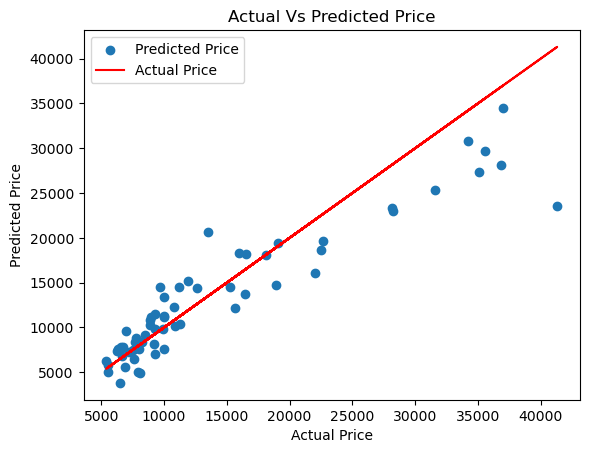

In [50]:
plt.scatter(x=y1_test, y=reg4.predict(std_X1_test), label = 'Predicted Price')
plt.plot(y1_test,y1_test,color = 'red',label = 'Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted Price')
plt.legend()
plt.show()

<h1 style="color:green">Comparison of four Linear Model<h1>

In [51]:
d = {
    'model' : ['Model_1','Model_2', 'Model_3','Model_4'],
    'encoding': ['OneHot','OneHot','Label','Label'], 
    'scaling': ['None', 'Standard', 'None', 'Standard'], 
    'train accuracy': [train1,train2,train3,train4],
    'test accuracy': [test1,test2,test3,test4],
    'r2_score': [r2_score1,r2_score2,r2_score3,r2_score4],
    'mse': [mse1,mse2,mse3,mse4],
    'rmse': [rmse1,rmse2,rmse3,rmse4],
    'mae': [mae1,mae2,mae3,mae4],   
}


d = pd.DataFrame(d)
d['mse'] = np.floor(d['mse'])
d['rmse'] = np.floor(d['rmse'])
d['mae'] = np.floor(d['mae'])
d['train accuracy'] = d['train accuracy'].round(4)
d['test accuracy'] = d['test accuracy'].round(4)
d['r2_score'] = d['r2_score'].round(4)

d

,model,encoding,scaling,train accuracy,test accuracy,r2_score,mse,rmse,mae
0,Model_1,OneHot,None,0.9615,0.9276,0.9276,6497892.0,2549.0,1667.0
1,Model_2,OneHot,Standard,0.9615,0.9256,0.9256,6672413.0,2583.0,1672.0
2,Model_3,Label,None,0.9091,0.8378,0.8378,14547845.0,3814.0,2582.0
3,Model_4,Label,Standard,0.9091,0.8378,0.8378,14547845.0,3814.0,2582.0


## Conclusion:
**Compairing four linear regression model, we see linear regression with OneHot Encoding and without feature scaling gives the best result with lowest MSE, RMSE, MAE and highest 92.76% r2_score.**